In [59]:
import pandas as pd
from sklearn.cross_validation import train_test_split

data = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
#data.head()
train, test = train_test_split(data, test_size = 0.4)
y_train = train["admit"].values
x_train = train[["gre","gpa","rank"]]
y_test = test["admit"].values
x_test = test[["gre","gpa","rank"]]


In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
predicted = model.predict(x_test)
probs = model.predict_proba(x_test)
#probs

auc =  0.703031851473


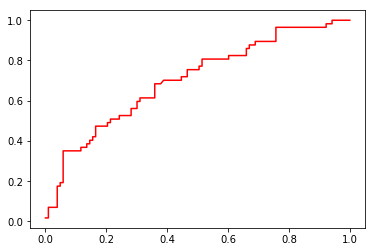

In [62]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1], pos_label=1)
plt.plot(fpr,tpr, color="red")
print("auc = ", metrics.auc(fpr, tpr))

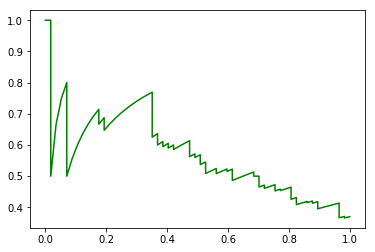

In [63]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs[:, 1])
plt.plot(recall, precision, color="green")

In [64]:
# binning GRE into up to 17 bins: [0,50],[51,100],...[751,800]
# AUC improved from 0.693 to 0.730

In [65]:
#binning
import numpy as np

def binning(x):
    xx = np.full([17],0.)
    xx[int(x/50)] = 1
    return xx

auc =  0.727683078077


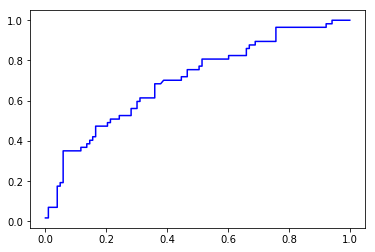

In [66]:
y_binned_train = data["admit"].values

def binning(x):
    xx = np.full([17],0.)
    xx[int(x/50)] = 1
    return xx

rank_binned = pd.DataFrame([binning(x) for x in data["gre"].values])
rank_binned.columns=range(17)
x_binned_train = pd.concat((data[["gpa","rank"]], rank_binned), axis=1)
# x_binned_train
y_binned_test = data["admit"].values
x_binned_test = pd.concat((data[["gpa","rank"]], rank_binned), axis=1)
# x_binned_test
mymodel = LogisticRegression()
mymodel.fit(x_binned_train,y_binned_train)

predicted = mymodel.predict(x_binned_test)
probs = mymodel.predict_proba(x_binned_test)

fpr_binned, tpr_binned, thresholds = metrics.roc_curve(y_binned_test, probs[:, 1], pos_label=1)
plt.plot(fpr,tpr, color="blue")
print("auc = ", metrics.auc(fpr_binned, tpr_binned))

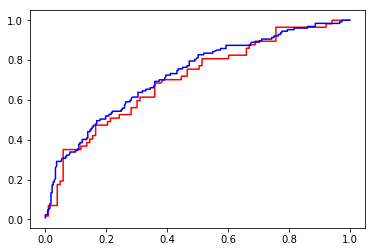

In [67]:
plt.plot(fpr,tpr, color="red")
plt.plot(fpr_binned,tpr_binned, color="blue")